In [2]:
%pip install --upgrade tensorflow-hub

     -------------------------------------- 100.6/100.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf
import cv2
import PIL
import PIL.Image as Image
import os
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
IMAGE_SHAPE=(224,224)
classifier = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE=(224,224)
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [19]:
sf = Image.open('./datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg').resize(IMAGE_SHAPE)

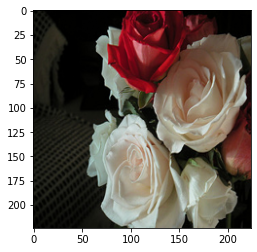

In [28]:
import matplotlib.pyplot as plt
plt.imshow(sf)

In [20]:
sf = np.array(sf)/255.0
sf.shape

(224, 224, 3)

In [21]:
sf[np.newaxis,...].shape

(1, 224, 224, 3)

In [22]:
result = classifier.predict(sf[np.newaxis,...])

1/1 [==============================] - 0s 51ms/step


In [14]:
result.shape

(1, 1001)

In [23]:
predictedlabel = np.argmax(result)
predictedlabel

460

In [17]:
with open("./ImageNetLabels.txt",'r') as f:
    image_label = f.read().splitlines()
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [24]:
image_label[predictedlabel]

'brassiere'

In [30]:
data_dir = '.\\datasets\\flower_photos'

In [31]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [33]:
image_count

3670

In [40]:
roses = list(data_dir.glob('roses/*'))

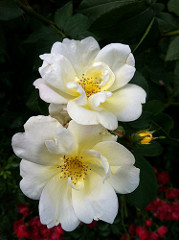

In [41]:
Image.open(str(roses[0]))

In [42]:
flowers_images_dict= {
    "roses" : list(data_dir.glob('roses/*')),
    "daisy" : list(data_dir.glob('daisy/*')),
    "tulips" : list(data_dir.glob('tulips/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
}


In [43]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    'tulips':4
}

In [44]:
X,y = [],[]

for flower_name , images in flowers_images_dict.items():
    # print(flower_name)
    # print(len(images))
    for image in images:
        img = img = cv2.imread(str(image))
        resized_image = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])


In [45]:
X = np.array(X)
y = np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [47]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

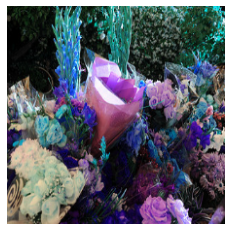

In [50]:
plt.axis('off')
plt.imshow(X[3])

In [52]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 0s 129ms/step


In [54]:
predicted = np.argmax(predicted,axis=1)

In [58]:
image_label[predicted[2]]

'shower curtain'

In [59]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained =     hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [60]:
numofflowers = 5
model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.Dense(numofflowers)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 72s 780ms/step - loss: 0.7913 - accuracy: 0.7078
Epoch 2/5
86/86 [==============================] - 73s 852ms/step - loss: 0.4187 - accuracy: 0.8536
Epoch 3/5
86/86 [==============================] - 61s 705ms/step - loss: 0.3266 - accuracy: 0.8932
Epoch 4/5
86/86 [==============================] - 59s 690ms/step - loss: 0.2750 - accuracy: 0.9106
Epoch 5/5
86/86 [==============================] - 60s 700ms/step - loss: 0.2359 - accuracy: 0.9295


In [62]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 705ms/step - loss: 0.3397 - accuracy: 0.8758


[0.3397030830383301, 0.8758170008659363]